# Plotting and Visualization

## Brief matplotlib API Primer

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

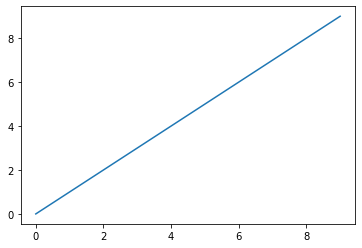

In [3]:
plt.plot(data)

### Figures and Subplots

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

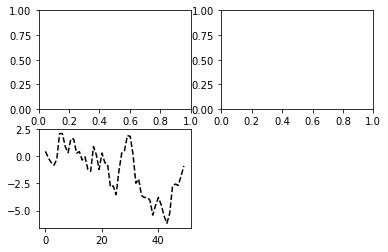

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

**'k--'** is a style option instructing matplotlib to plot a black dashed line

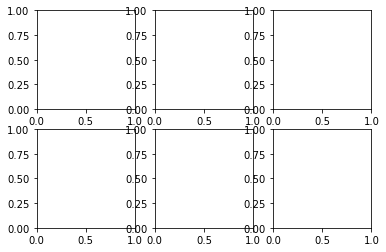

In [10]:
fig, axes = plt.subplots(2, 3)

#### Adjusting the spacing around subplots

You can change the spacing using the subplots_adjust method on Figure objects, also available as a top-level function:
    
    * subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    
**wspace** and **hspace** controls the percent of the figure width and figure height, respectively, to use as spacing between subplots.

### Colors, Markers and Line Styles

In [12]:
from numpy.random import randn

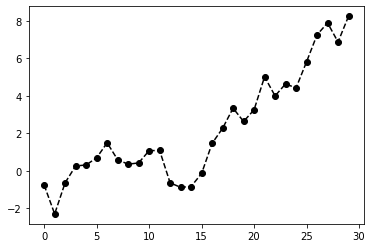

In [13]:
plt.plot(randn(30).cumsum(), "ko--")

This can be also written in a more explicit way

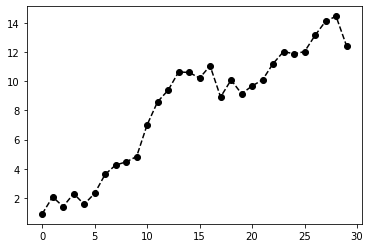

In [15]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [16]:
plt.close("all")

For line plots, subsequent points are linearly interpolated by default. This can be altered with **drawstyle** option

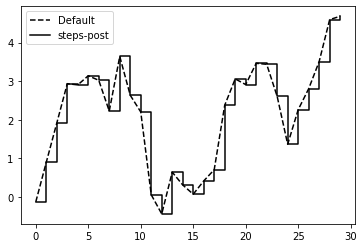

In [17]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

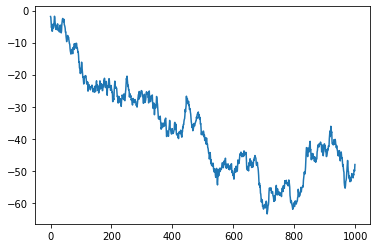

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it is easiest to use **set_xticks** and **set_xticklabels**. The former instructs matplotlib where to place the ticks along the data range.

In [19]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [20]:
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize="small")

The rotation option sets the x tick label at a 30-degree rotation.

In [21]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

### Adding legends

In [23]:
from numpy.random import randn

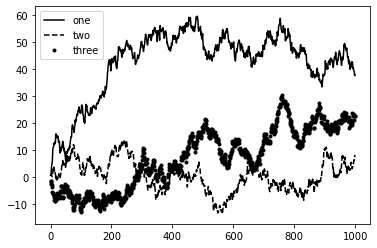

In [31]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), "k", label="one")
ax.plot(randn(1000).cumsum(), "k--", label="two")
ax.plot(randn(1000).cumsum(), "k.", label="three")
ax.legend(loc="best")

### Annotations and Drawing on a Subplot

You can add annotations and text using the **text, arrow, annotate** functions

In [34]:
from datetime import datetime
import pandas as pd

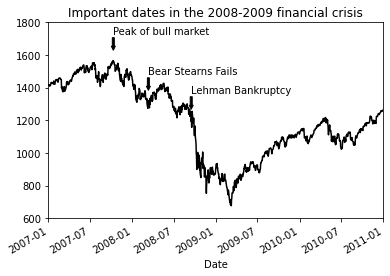

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv("../examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, style="k-")

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')
plt.show()


* **ax.annotate** method can draw labels at the indicated x and y coordinates

* **set_xlim** and **set_ylim** methods are used to manually set the start and end boundaries for the plot

### matplotlib Configuration

One way to modify the confguratio programmatically for Python is to use the **rc** method.

## Plotting with pandas a seaborn

### Line Plots

By default, **plot()** makes line plots

In [38]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))

<AxesSubplot:>

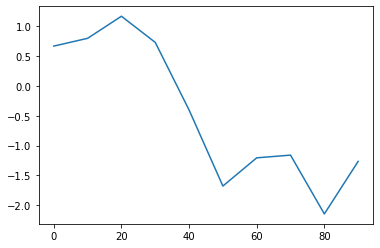

In [39]:
s.plot()

DataFrame **plot** method plots each of its columns as a different line on the same subplot, creating a legend automatically.

In [41]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.767325,0.420606,1.344750,-0.430922
10,0.795132,1.653382,0.021662,0.542099
20,-1.007443,-0.199793,0.387155,1.046841
30,-1.995286,0.582546,1.155649,2.756715
40,-1.891966,0.040058,-0.640803,3.810544
50,-1.959187,1.534547,-0.615044,3.656339
60,-2.514421,1.673510,-1.760908,2.178641
70,-0.499609,4.068758,-2.378902,0.938858
80,-0.587406,3.602303,-1.686786,1.346840
90,-3.008157,4.638130,-2.927077,0.879420


<AxesSubplot:>

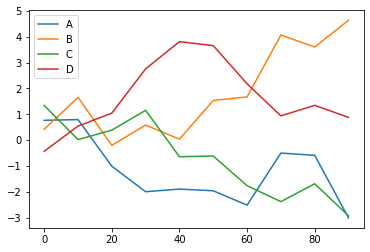

In [42]:
df.plot()

### Bar Plots

The **plot.bar()** and **plot.barh()** make vertical and horizontal bar plots, respectively.

<AxesSubplot:>

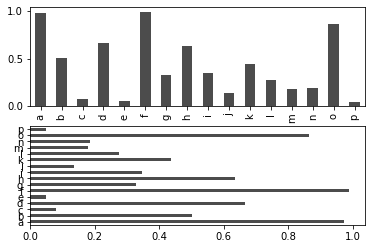

In [43]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [45]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.299633,0.247408,0.374789,0.444470
two,0.587963,0.752514,0.108545,0.822805
three,0.319512,0.037817,0.501125,0.151780
four,0.122624,0.018675,0.873850,0.339293
five,0.853779,0.077577,0.929615,0.305870
six,0.398263,0.745855,0.281755,0.773897


<AxesSubplot:>

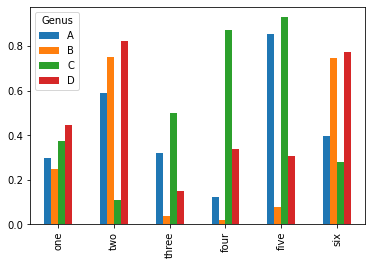

In [46]:
df.plot.bar()

<AxesSubplot:>

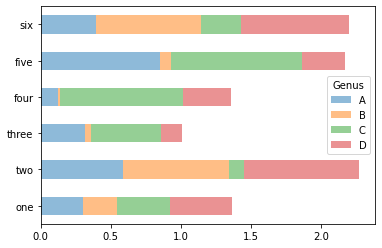

In [47]:
df.plot.barh(stacked=True, alpha=0.5)

In [50]:
tips = pd.read_csv("../examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [52]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [54]:
# Not many 1 and 6 person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [56]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

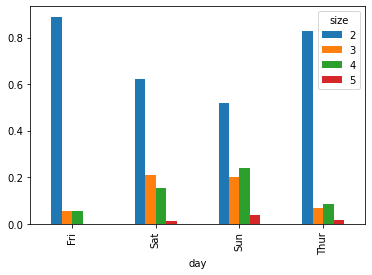

In [57]:
party_pcts.plot.bar()

With data that requires aggregation or summarization before making a plot, using **seaborn** package can make things much simpler

In [58]:
import seaborn as sns

In [59]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

In [60]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

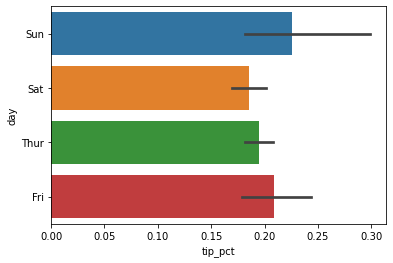

In [61]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

### Histograms and Density Plots

<AxesSubplot:ylabel='Frequency'>

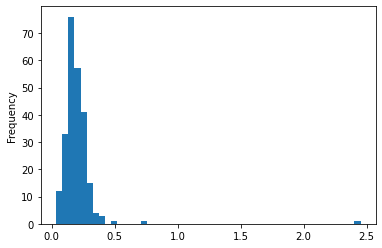

In [62]:
tips["tip_pct"].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

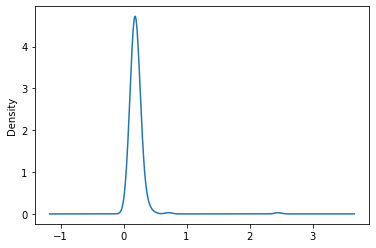

In [63]:
tips["tip_pct"].plot.density()

<AxesSubplot:ylabel='Count'>

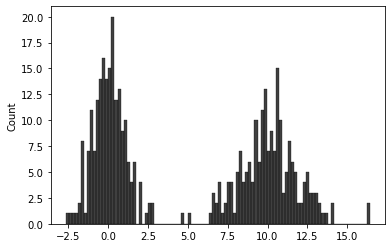

In [69]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color='k')

### Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series.

In [70]:
macro = pd.read_csv("../examples/macrodata.csv")
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [71]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [72]:
trans_data = np.log(data).diff().dropna()

In [74]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Seaborn method **regplot** can be used wich makes a scatter plot and fits a linear regression line.

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

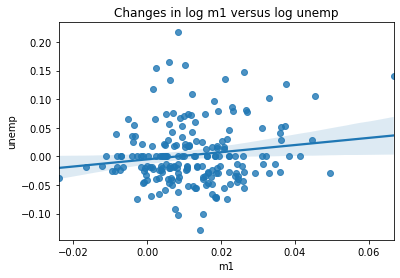

In [77]:
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Seaborn has a **pairplot** function. which supports placing histograms or density estimates of each variable along the diagonal

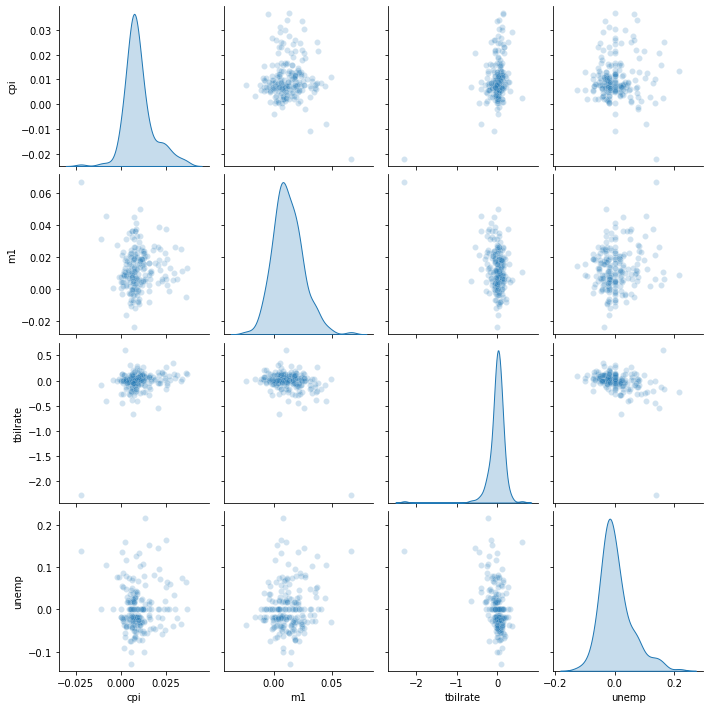

In [78]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha":0.2})

### Facet Grids and Categorical Data

One way to visualize data with many categorical variables is to use a facet grid.

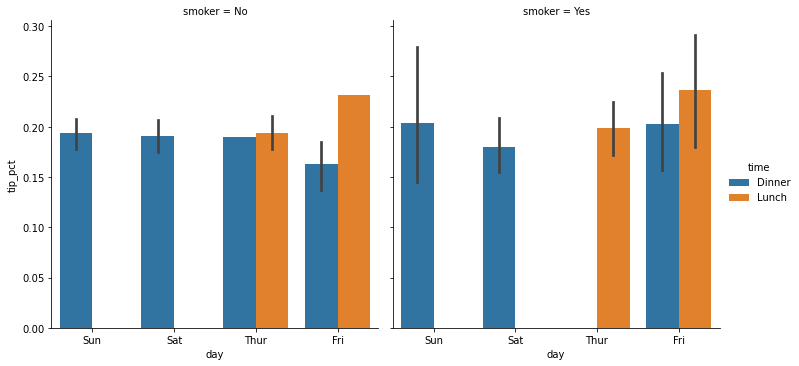

In [80]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

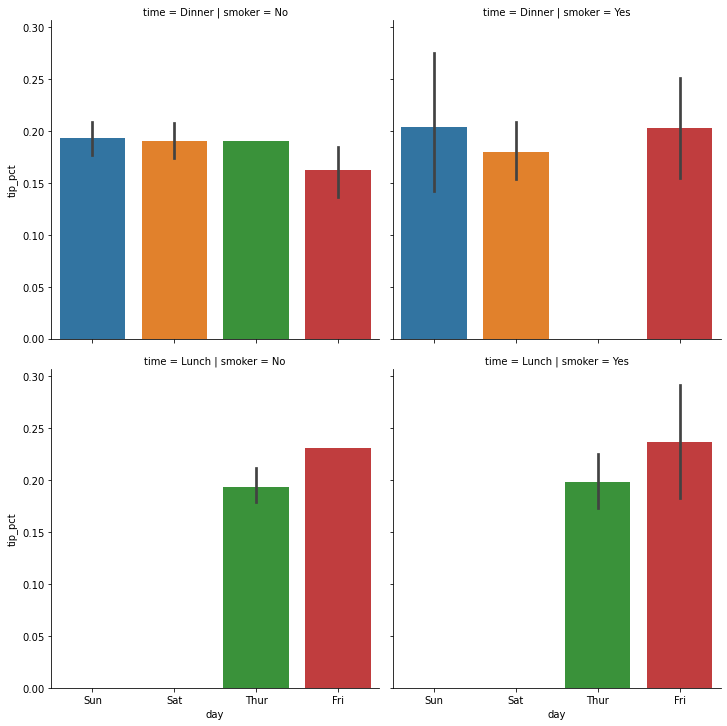

In [85]:
sns.catplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])


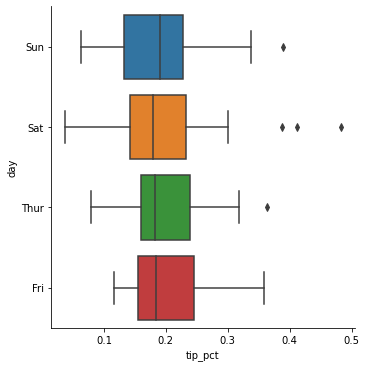

In [87]:
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])